Turbine 0, T0: kTI_02, NREL-5MW
Turbine 1, T1: kTI_02, NREL-5MW
Turbine 2, T2: kTI_02, NREL-5MW
Turbine 3, T3: kTI_02, NREL-5MW
Turbine 4, T4: kTI_02, NREL-5MW
Turbine 5, T5: kTI_02, NREL-5MW
Turbine 6, T6: kTI_02, NREL-5MW
Turbine 7, T7: kTI_02, NREL-5MW
Turbine 8, T8: kTI_02, NREL-5MW
Turbine 9, T9: kTI_02, NREL-5MW
Turbine 10, T10: kTI_02, NREL-5MW
Turbine 11, T11: kTI_02, NREL-5MW
Turbine 12, T12: kTI_02, NREL-5MW
Turbine 13, T13: kTI_02, NREL-5MW
Turbine 14, T14: kTI_02, NREL-5MW
Turbine 15, T15: kTI_02, NREL-5MW
Turbine 16, T16: kTI_02, NREL-5MW
Turbine 17, T17: kTI_02, NREL-5MW
Turbine 18, T18: kTI_02, NREL-5MW
Turbine 19, T19: kTI_02, NREL-5MW
Turbine 20, T20: kTI_02, NREL-5MW
Turbine 21, T21: kTI_02, NREL-5MW
Turbine 22, T22: kTI_02, NREL-5MW
Turbine 23, T23: kTI_02, NREL-5MW
Turbine 24, T24: kTI_02, NREL-5MW
Turbine 25, T25: kTI_02, NREL-5MW
Turbine 26, T26: kTI_02, NREL-5MW
Turbine 27, T27: kTI_02, NREL-5MW
Turbine 28, T28: kTI_02, NREL-5MW
Turbine 29, T29: kTI_02, NREL-5MW


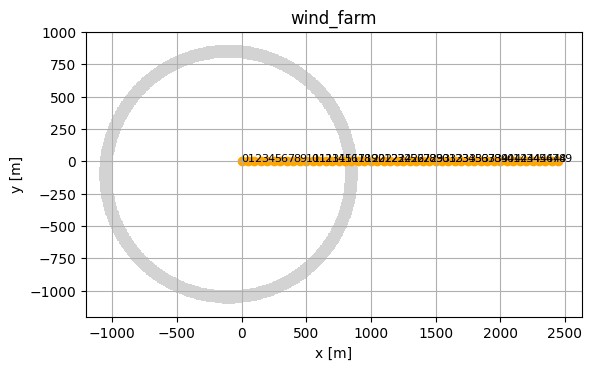

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       10 |  1.228348E+04 |  1.316603E+04 |             - |             -
     2 |       20 |  1.121821E+04 |  1.240286E+04 |             - |             -
     3 |       30 |  1.121821E+04 |  1.183799E+04 |             - |             -
     4 |       40 |  1.086006E+04 |  1.138893E+04 |             - |             -
     5 |       50 |  1.086006E+04 |  1.126892E+04 |             - |             -
Optimizer_pymoo: Optimization run finished
  Success: False

Results problem 'layout_opt':
------------------------------
  Success: False
------------------------------



TypeError: 'NoneType' object is not subscriptable

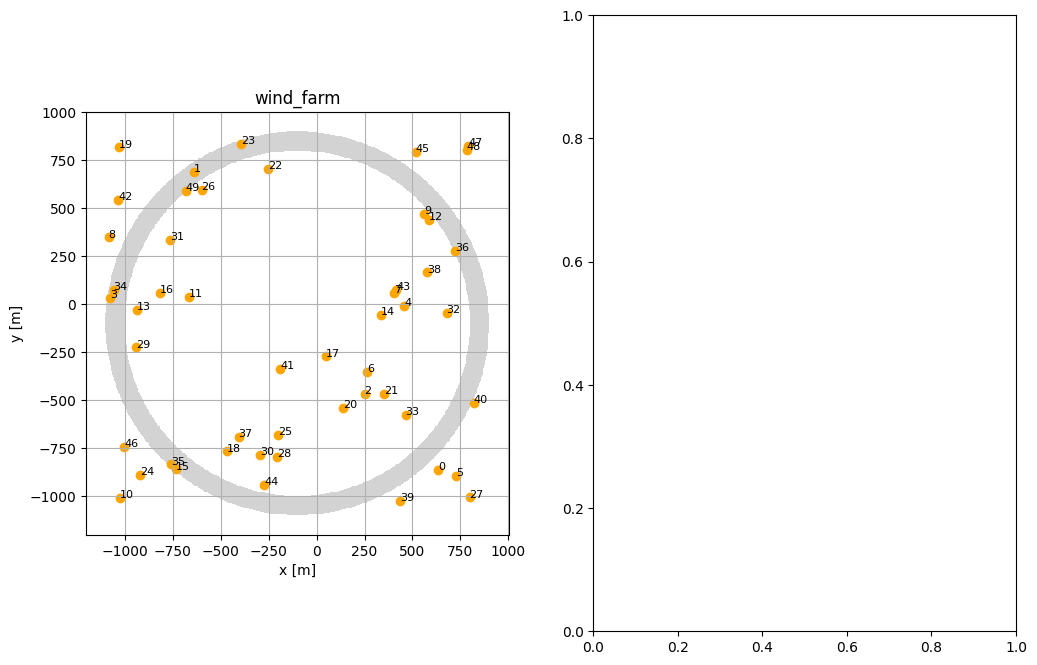

In [12]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
from iwopy.interfaces.pymoo import Optimizer_pymoo

import foxes
from foxes.opt.problems.layout import FarmLayoutOptProblem
from foxes.opt.constraints import FarmBoundaryConstraint, MinDistConstraint
from foxes.opt.objectives import MaxFarmPower

# if __name__ == "__main__":
# parser = argparse.ArgumentParser()
# parser.add_argument(
#     "-nt", "--n_t", help="The number of turbines", type=int, default=10
# )
# parser.add_argument(
#     "-t",
#     "--turbine_file",
#     help="The P-ct-curve csv file (path or static)",
#     default="NREL-5MW-D126-H90.csv",
# )
# parser.add_argument("-r", "--rotor", help="The rotor model", default="centre")
# parser.add_argument(
#     "-w",
#     "--wakes",
#     help="The wake models",
#     default=["Bastankhah025_linear_k002"],
#     nargs="+",
# )
# parser.add_argument("-p", "--pwakes", help="The partial wakes model", default=None)
# parser.add_argument("--ws", help="The wind speed", type=float, default=9.0)
# parser.add_argument("--wd", help="The wind direction", type=float, default=270.0)
# parser.add_argument("--ti", help="The TI value", type=float, default=0.08)
# parser.add_argument("--rho", help="The air density", type=float, default=1.225)
# parser.add_argument(
#     "-d",
#     "--min_dist",
#     help="Minimal turbine distance in unit D",
#     type=float,
#     default=None,
# )
# parser.add_argument(
#     "-A", "--opt_algo", help="The pymoo algorithm name", default="GA"
# )
# parser.add_argument(
#     "-P", "--n_pop", help="The population size", type=int, default=50
# )
# parser.add_argument(
#     "-G", "--n_gen", help="The nmber of generations", type=int, default=300
# )
# parser.add_argument(
#     "-nop", "--no_pop", help="Switch off vectorization", action="store_true"
# )
# parser.add_argument("-sc", "--scheduler", help="The scheduler choice", default=None)
# parser.add_argument(
#     "-n",
#     "--n_workers",
#     help="The number of workers for distributed run",
#     type=int,
#     default=None,
# )
# parser.add_argument(
#     "-tw",
#     "--threads_per_worker",
#     help="The number of threads per worker for distributed run",
#     type=int,
#     default=None,
# )
# args = parser.parse_args()

mbook = foxes.models.ModelBook()
ttype = foxes.models.turbine_types.PCtFile("NREL-5MW-D126-H90.csv")
mbook.turbine_types[ttype.name] = ttype

boundary = (
            foxes.utils.geom2d.Circle([-100.0, -100.0], 1000)
          - foxes.utils.geom2d.Circle([-100.0, -100.0], 900)
)


farm = foxes.WindFarm(boundary=boundary)
foxes.input.farm_layout.add_row(
    farm=farm,
    xy_base=np.zeros(2),
    xy_step=np.array([50.0, 0.0]),
    n_turbines=50,
    turbine_models=["kTI_02", ttype.name],
)
states = foxes.input.states.SingleStateStates(
    ws=9, wd=260, ti=0.05, rho=1.225
)

algo = foxes.algorithms.Downwind(
    farm,
    states,
    rotor_model="centre",
    wake_models=["Bastankhah025_linear_k002"],
    wake_frame="rotor_wd",
    partial_wakes=None,
    mbook=mbook,
    verbosity=0,
)

with foxes.utils.runners.DaskRunner(
    scheduler=None,
    n_workers=None,
    threads_per_worker=None,
    progress_bar=False,
    verbosity=1,
) as runner:
    problem = FarmLayoutOptProblem("layout_opt", algo, runner=runner)
    problem.add_objective(MaxFarmPower(problem))
    problem.add_constraint(FarmBoundaryConstraint(problem, disc_inside=True))
    if None is not None:
        problem.add_constraint(
            MinDistConstraint(problem, min_dist=args.min_dist, min_dist_unit="D")
        )
    problem.initialize()

    solver = Optimizer_pymoo(
        problem,
        problem_pars=dict(
            vectorize=False,
        ),
        algo_pars=dict(
            type="GA",
            pop_size=10,
            seed=None,
        ),
        setup_pars=dict(),
        term_pars=dict(
            type="default",
            n_max_gen=5,
            ftol=1e-6,
            xtol=1e-6,
        ),
    )
    solver.initialize()
    solver.print_info()

    ax = foxes.output.FarmLayoutOutput(farm).get_figure()
    plt.show()
    plt.close(ax.get_figure())

    results = solver.solve()
    solver.finalize(results)

    print()
    print(results)

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    foxes.output.FarmLayoutOutput(farm).get_figure(fig=fig, ax=axs[0])

    o = foxes.output.FlowPlots2D(algo, results.problem_results)
    p_min = np.array([-1100.0, -1100.0])
    p_max = np.array([1100.0, 1100.0])
    fig = o.get_mean_fig_xy(
        "WS",
        resolution=20,
        fig=fig,
        ax=axs[1],
        xmin=p_min[0],
        xmax=p_max[0],
        ymin=p_min[1],
        ymax=p_max[1],
    )
    dpars = dict(alpha=0.6, zorder=10, p_min=p_min, p_max=p_max)
    farm.boundary.add_to_figure(
        axs[1], fill_mode="outside_white", pars_distance=dpars
    )

    plt.show()
    plt.close(fig)
